<a href="https://colab.research.google.com/github/Luke-Byrne-MEng/Casting-K-Means-Clustering/blob/main/Casting_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script takes casting widths in csv form and performs regressive k means clustering to group them together into gripper families

Saving cell2.csv to cell2 (8).csv
cell2.csv
                Name  Width
0           99010424    129
1           98619901     90
2           95120767    140
3           99074851    188
4           96098589    249
5           95120795    154
6           96437559    150
7           99009905    125
8           96486321    300
9           95121005    180
10          96493001    200
11          95121021    174
12          96437557    150
13          95121032    180
14          95121018    184
15          98638005    115
16          95120809    140
17  gs100.3-12.19.02    135
18          97918408    120
19          67945500    172
20          99071203    134
21          97921373    120


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


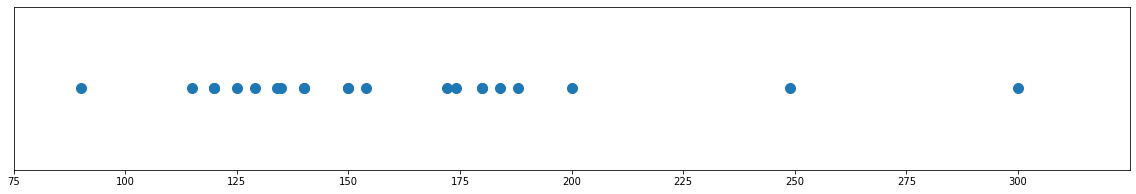

In [10]:
# This script takes csv files in the format: Name, Width
# and seperates them into families via k-means clustering.


#### Setup #####
# This section imports all necissary libraries and allows user to upload an
# apropriate csv file

import numpy as np                  # numpy for data manipulation
import pandas as pd                 # pandas for reading the csv
import matplotlib.pyplot as plt     # pyplot for creating charts of data
from sklearn.cluster import KMeans  # sklearn for k means clustering
from google.colab import files      # colab for file uploads

uploaded = files.upload()     # allow user to upload a csv file
filename = 'NO FILE UPLOADED' # set default filename to 'NO FILE UPLOADED'
for fn in uploaded.keys():    # replace default filename with uploaded file
    filename = fn
print(filename)               # If a file has been selected then print filename,
                              # if not, then print 'NO FILE UPLOADED'

data = pd.read_csv(filename)  # Use Pandas to read csv file
print(data)                   # Print csv contents

# Show results as scatterplot
plt.xlim(75,325)
plt.xticks(np.arange(75,325,25))
plt.ylim(0,0)
plt.yticks([])
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(data['Width'],np.zeros(len(data['Width'])),s=100)

Range of Cluster 0: 28mm
Range of Cluster 1: 25mm
Range of Cluster 2: 0mm
Range of Cluster 3: 0mm
Range of Cluster 4: 35mm

                Name  Width  Cluster
10          96493001    200        0
19          67945500    172        0
3           99074851    188        0
14          95121018    184        0
13          95121032    180        0
11          95121021    174        0
9           95121005    180        0
17  gs100.3-12.19.02    135        1
16          95120809    140        1
12          96437557    150        1
0           99010424    129        1
6           96437559    150        1
5           95120795    154        1
2           95120767    140        1
20          99071203    134        1
8           96486321    300        2
4           96098589    249        3
7           99009905    125        4
15          98638005    115        4
18          97918408    120        4
1           98619901     90        4
21          97921373    120        4



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


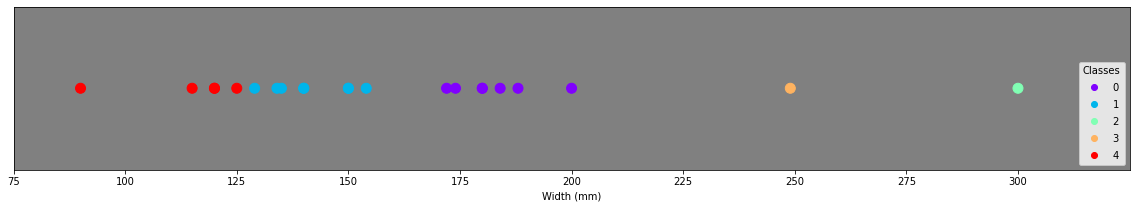

In [6]:
#### Clustering ####

# This section will cluster the castings into k number of families
# k must be specified before hand.
# start with a small k value and increase until the cluster
# ranges are all within acceptable limits (aprox half gripper stroke)

k=5

x = data.iloc[:,1:3]  # pull out the widths from the csv file
kmeans = KMeans(k)    # perform k means clustering
kmeans.fit(x)
clusters = kmeans.fit_predict(x)

# Add cluster data to DataFrame, then sort by cluster
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters
data_with_clusters.sort_values(by=['Cluster'], inplace=True)
print(data_with_clusters) # print new DataFrame with cluster column


# For each cluster measure the range of widths, then print this
for i in range(0,k):
  In = data_with_clusters.groupby(data_with_clusters.Cluster)
  In = In.get_group(i)
  I = str(i)
  stroke = str(max(In.Width) - min(In.Width))
  print("Range of Cluster " + I + ": " + stroke + "mm")


# show results as scatter plot

fig, ax = plt.subplots()
scatter = ax.scatter(data_with_clusters['Width'], y,
                     c=data_with_clusters['Cluster'],cmap='rainbow',
                     s=100,label='color')
plt.xlabel("Width (mm)")
ax.set_facecolor('grey')
ax.axes.yaxis.set_visible(False)
plt.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
plt.rcParams["figure.figsize"] = (20,3)
plt.xlim(75,325)
plt.xticks(np.arange(75,325,25))
plt.ylim(0,0)